Importing the libraries and dataset. Also taking a look at the dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

slidings = pd.read_csv('Data\slidings_training.csv')
slidings = slidings.drop(columns='Unnamed: 0',axis=1)
slidings.head()

,situation,location,risk,victims,deadly_victims,length,num_points,in_place,sliding,Rain
0,1,1,0,0,0,0,0,0,1,0.60
1,1,1,0,0,0,0,0,0,1,0.60
2,1,1,0,0,0,0,0,0,1,0.13
3,1,1,0,0,0,0,0,0,1,2.17
4,1,1,0,0,0,0,0,0,1,93.60


In [2]:
slidings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45931 entries, 0 to 45930
Data columns (total 10 columns):
situation         45931 non-null int64
location          45931 non-null int64
risk              45931 non-null int64
victims           45931 non-null int64
deadly_victims    45931 non-null int64
length            45931 non-null int64
num_points        45931 non-null int64
in_place          45931 non-null int64
sliding           45931 non-null int64
Rain              45931 non-null float64
dtypes: float64(1), int64(9)
memory usage: 3.5 MB


After running the random forest classifier model, it came to our attention that the situation feature might be leading to odd behaviours so in this notebook we will do the exact same proceedure but without this feature.

In [3]:
random_state = 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = slidings.drop(columns={'sliding','situation'},axis=1)
y= slidings['sliding']

model = RandomForestClassifier()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=random_state)

model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
X.head()

,location,risk,victims,deadly_victims,length,num_points,in_place,Rain
0,1,0,0,0,0,0,0,0.60
1,1,0,0,0,0,0,0,0.60
2,1,0,0,0,0,0,0,0.13
3,1,0,0,0,0,0,0,2.17
4,1,0,0,0,0,0,0,93.60


              precision    recall  f1-score   support

           0       0.79      0.86      0.82      6068
           1       0.66      0.55      0.60      3119

    accuracy                           0.75      9187
   macro avg       0.73      0.70      0.71      9187
weighted avg       0.75      0.75      0.75      9187



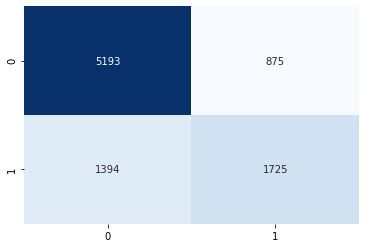

In [5]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ricardo_2\AppData\Roaming\Python\Python37\s

The maximum precision for  2  depth found was  1.000  with  5  estimators.
The maximum accuracy for  2  depth found was  0.661  with  50  estimators.

The maximum precision for  3  depth found was  0.905  with  10  estimators.
The maximum accuracy for  3  depth found was  0.667  with  5  estimators.

The maximum precision for  4  depth found was  0.888  with  45  estimators.
The maximum accuracy for  4  depth found was  0.673  with  10  estimators.

The maximum precision for  5  depth found was  0.686  with  30  estimators.
The maximum accuracy for  5  depth found was  0.677  with  20  estimators.

The maximum precision for  6  depth found was  0.658  with  90  estimators.
The maximum accuracy for  6  depth found was  0.680  with  55  estimators.

The maximum precision for  7  depth found was  0.655  with  90  estimators.
The maximum accuracy for  7  depth found was  0.682  with  30  estimators.



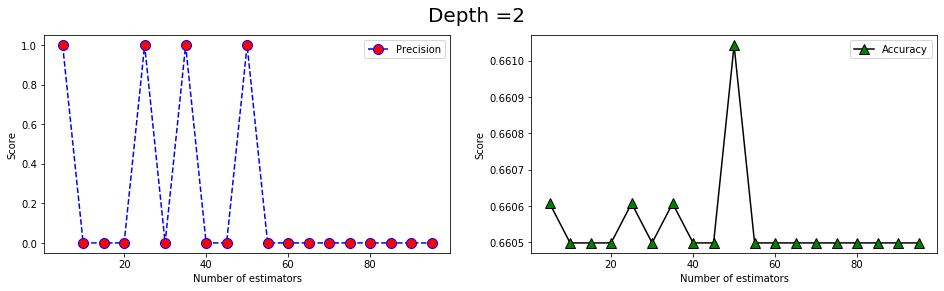

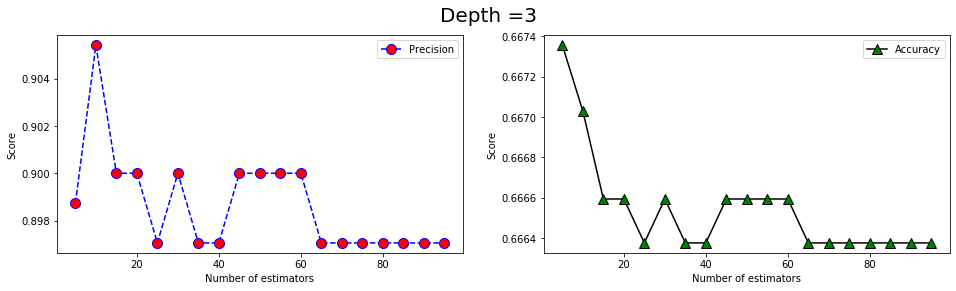

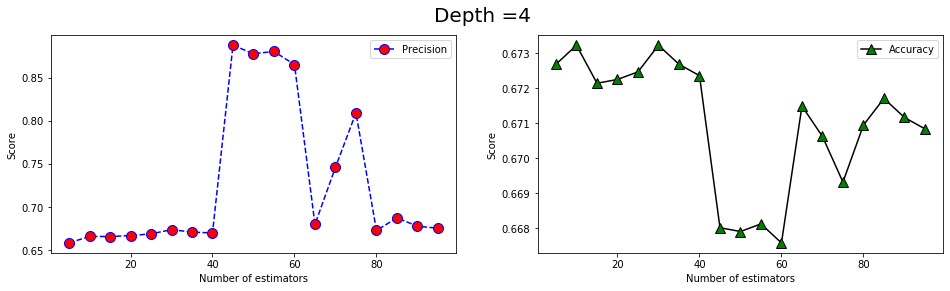

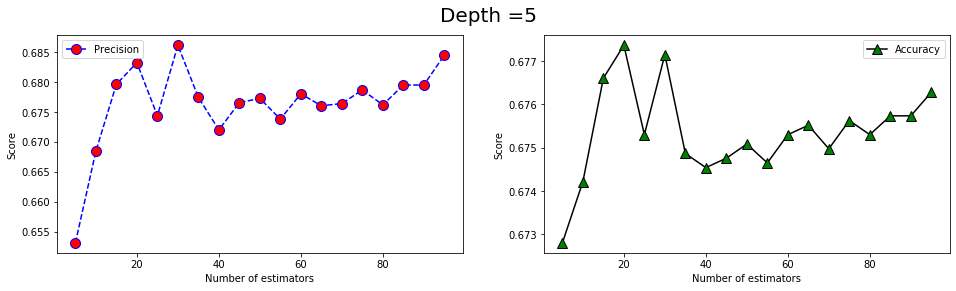

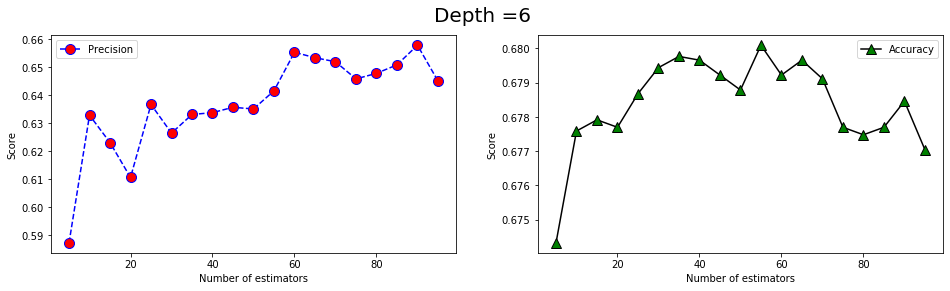

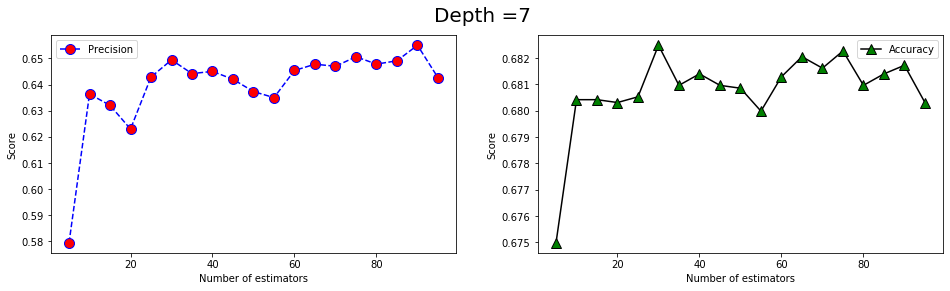

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, accuracy_score

for depth in range (2,8):
    precision = []
    accuracy = []
    for estimators in range(5,100,5):
        model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
        model.fit(X_train,y_train)
        predictions = model.predict(X_test)
        precision.append(precision_score(y_test,predictions))
        accuracy.append(accuracy_score(y_test,predictions))
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,4))
    fig.suptitle('Depth ='+str(depth),fontsize=20)
    ax1.plot(range(5,100,5),precision,label='Precision',color='blue',linestyle='dashed',marker='o', markerfacecolor='red',markersize=10,)
    ax2.plot(range(5,100,5),accuracy,label='Accuracy',color='black',marker='^', markerfacecolor='green',markersize=10)
    ax1.set(xlabel='Number of estimators', ylabel='Score')
    ax2.set(xlabel='Number of estimators', ylabel='Score')
    ax1.legend()
    ax2.legend()
    print('The maximum precision for ',depth,' depth found was ','%.3f' %max(precision),' with ',precision.index(max(precision))*5+5,' estimators.')
    print('The maximum accuracy for ',depth,' depth found was ','%.3f' %max(accuracy),' with ',accuracy.index(max(accuracy))*5+5,' estimators.\n')
    

After depth 3 the variation for both the precision and accuracy seems to be too great, so we'll go on with depth = 3 and estimators = 10, and take a more in-depth look with these hyperparameters.

              precision    recall  f1-score   support

           0       0.67      1.00      0.80      6068
           1       0.91      0.02      0.04      3119

    accuracy                           0.67      9187
   macro avg       0.79      0.51      0.42      9187
weighted avg       0.75      0.67      0.54      9187



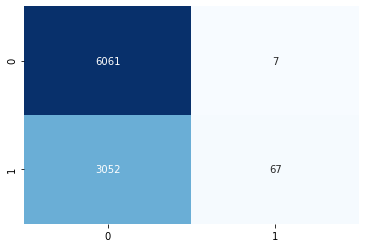

In [7]:
depth = 3
estimators = 10
model = RandomForestClassifier(n_estimators=estimators,max_depth=depth,random_state=random_state)
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
cfm = confusion_matrix(y_test,predictions)
sns.heatmap(cfm, cbar=False, annot=True, cmap='Blues', fmt='d')

In [8]:
model.score(X,y)

0.6762752824889509

In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=10)
scores

array([0.35002177, 0.67036795, 0.67232745, 0.67189201, 0.68038319,
       0.66993251, 0.67102112, 0.67210973, 0.66427172, 0.47267581])

In [10]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.62 (+/- 0.22)


In [11]:
scores_precision = cross_val_score(model, X, y, cv=10, scoring='precision')
scores_precision

array([0.31923266, 0.625     , 0.86666667, 0.90909091, 0.69047619,
       0.5       , 0.85714286, 1.        , 0.11428571, 0.37250492])

In [12]:
print("Precision: %0.2f (+/- %0.2f)" % (scores_precision.mean(), scores_precision.std() * 2))

Precision: 0.63 (+/- 0.56)


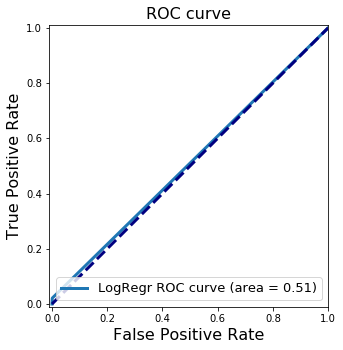

In [13]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(5,10))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr, tpr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.gca().set_aspect('equal')
plt.show()

In [14]:
importances = model.feature_importances_
for i in range(X.shape[1]):
    print( X.columns[i],"%.4f" % importances[i])

location 0.0602
risk 0.1969
victims 0.0008
deadly_victims 0.0015
length 0.2457
num_points 0.1381
in_place 0.2591
Rain 0.0977


The distribution of the feature wieght seems to be more realistic in this model, however as we can see by the ROC curve this is pretty much the same as a randomic model. So the next step is trying to adjust the risk feature. The majority of the risk entries are not informed, so we can try and give the 0 value, which represents this case, less weight by making the other risk entries more distant. 